In [10]:
import numpy as np
import matplotlib.pyplot as plt

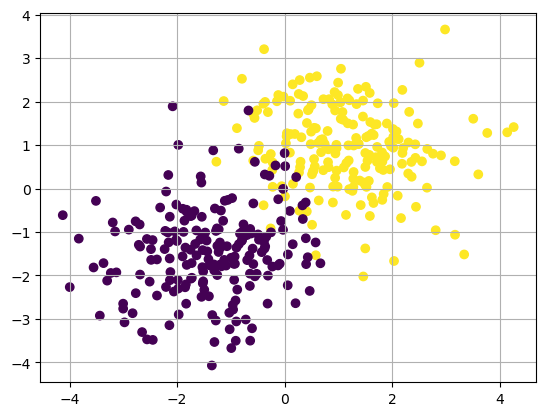

In [12]:
def generate_data(N):
    s1 = np.random.multivariate_normal([1,1],[[1,0],[0,1]], size = N)
    s2 = np.random.multivariate_normal([-1.5,-1.5],[[1,0.2],[0.2,1.0]], size = N)
    X = np.concatenate([s1,s2])
    z = np.concatenate([np.ones(N),np.zeros(N)])
    return X,z

X,z = generate_data(200)
plt.scatter(X[:,0],X[:,1],c = z)
plt.grid()
plt.show()

In [13]:
def linear(x,parameters):
    out = x @ parameters[:2].T + parameters[2]
    return out

def sigmoid(x):
    out = 1/(1+np.exp(-x))
    return out

def loss(z, theta):
    out = np.where(z==1,-np.log(theta),-np.log(1-theta))
    return out

def empirical_risk(X,z,pars):
    mapped = linear(X,pars)
    theta = sigmoid(mapped)
    loss_val = loss(z,theta)
    return loss_val.mean(axis=0)

In [14]:
def plot(X,z,pars):
    grid = np.mgrid[-5:5:101j,-5:5:101j]
    Xi = np.swapaxes(grid,0,-1).reshape(-1,2)   
    p = sigmoid(linear(X,pars))
    zi = sigmoid(linear(Xi,pars))
    zi = zi.reshape(101,101).T
    plt.contour(grid[0],grid[1],zi)
    plt.scatter(X[:,0],X[:,1],c = z)
    plt.xlim(-5,5)
    plt.ylim(-5,5)

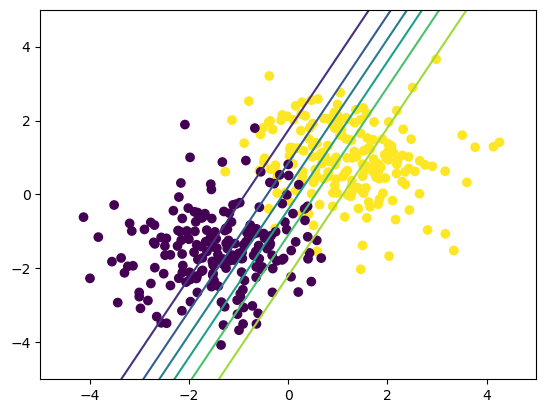

In [15]:
phi = np.array([2.0 , -1.0 , 0.0])
plot(X,z,phi)

In [16]:
def linear2(x,parameters):
    out = x @ parameters[:2].T + parameters[2]
    grad = np.column_stack([x,np.ones(len(x))])
    return out,grad

def sigmoid2(x):
    out = 1/(1+np.exp(-x))
    grad = out*(1-out)
    return out,grad.reshape(-1,1)

def loss2(z, theta):
    out = np.where(z==1,-np.log(theta),-np.log(1-theta))
    grad = np.where(z==1,-1/theta,-1/(1-theta)*(-1))
    return out,grad.reshape(-1,1)

def empirical_risk2(X,z,pars):
    mapped,g3 = linear2(X,pars)
    theta,g2 = sigmoid2(mapped)
    loss_val,g1 = loss2(z,theta)
    grad = g1*g2*g3
    return loss_val.mean(axis=0),grad.mean(axis=0)

In [22]:
def plot2(X,z,pars):
    grid = np.mgrid[-5:5:101j,-5:5:101j]
    Xi = np.swapaxes(grid,0,-1).reshape(-1,2)   
    p = sigmoid2(linear2(X,pars)[0])[0]
    zi = sigmoid2(linear2(Xi,pars)[0])[0]
    zi = zi.reshape(101,101).T
    plt.contour(grid[0],grid[1],zi)
    plt.scatter(X[:,0],X[:,1],c = z)
    plt.xlim(-5,5)
    plt.ylim(-5,5)

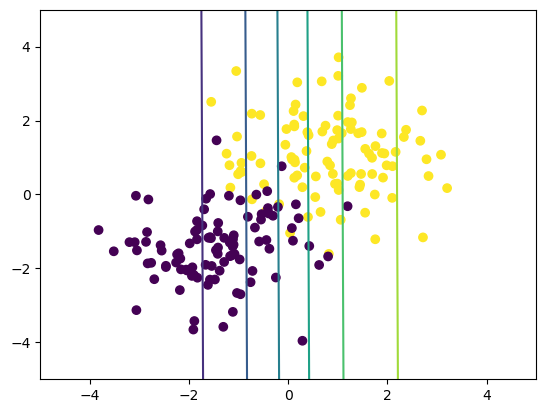

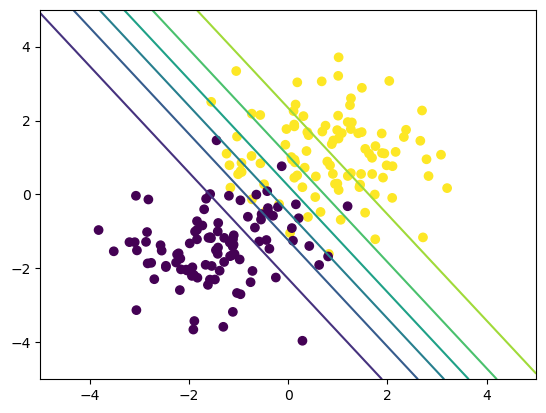

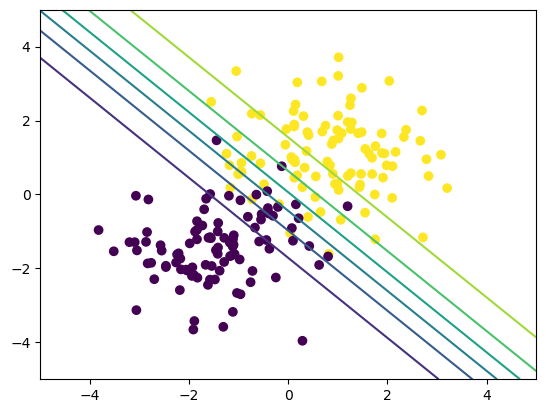

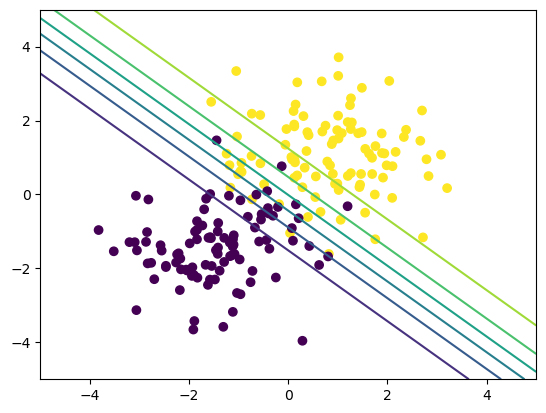

In [23]:
def train():
    x,y = generate_data(100)
    phi = np.array([1,0,0])
    for i in range(2000):
        val,grad = empirical_risk2(x,y,phi)
        phi = phi - 0.01*grad
        if i%500 == 0:
            plot2(x,y,phi)
            plt.show()
    
train()